# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [2]:

df = pd.read_csv("Personalized_Diet_Recommendations.csv")
df.head()

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan
0,P00001,56,Other,163,66,24.84,NaN,175,75,219,...,105,179,143,Western,NaN,2150,108,139,145,High-Protein Diet
1,P00002,69,Female,171,114,38.99,NaN,155,72,208,...,69,315,75,Mediterranean,NaN,1527,74,266,80,Balanced Diet
2,P00003,46,Female,172,119,40.22,NaN,137,101,171,...,183,103,148,Western,Sweet,2359,180,145,143,High-Protein Diet
3,P00004,32,Female,197,118,30.41,NaN,148,91,258,...,135,371,120,Western,NaN,2858,137,378,135,High-Protein Diet
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,167,298,48,Indian,Spicy,1937,166,317,56,High-Protein Diet


In [3]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Handle categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Display cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                5000 non-null   int32  
 1   Age                       5000 non-null   int64  
 2   Gender                    5000 non-null   int32  
 3   Height_cm                 5000 non-null   int64  
 4   Weight_kg                 5000 non-null   int64  
 5   BMI                       5000 non-null   float64
 6   Chronic_Disease           5000 non-null   int32  
 7   Blood_Pressure_Systolic   5000 non-null   int64  
 8   Blood_Pressure_Diastolic  5000 non-null   int64  
 9   Cholesterol_Level         5000 non-null   int64  
 10  Blood_Sugar_Level         5000 non-null   int64  
 11  Genetic_Risk_Factor       5000 non-null   int32  
 12  Allergies                 5000 non-null   int32  
 13  Daily_Steps               5000 non-null   int64  
 14  Exercise

        Patient_ID          Age      Gender    Height_cm   Weight_kg  \
count  5000.000000  5000.000000  5000.00000  5000.000000  5000.00000   
mean   2499.500000    48.805600     0.99160   174.244000    84.36620   
std    1443.520003    17.906991     0.81833    14.229173    20.18103   
min       0.000000    18.000000     0.00000   150.000000    50.00000   
25%    1249.750000    34.000000     0.00000   162.000000    67.00000   
50%    2499.500000    49.000000     1.00000   174.000000    84.00000   
75%    3749.250000    64.000000     2.00000   186.000000   102.00000   
max    4999.000000    79.000000     2.00000   199.000000   119.00000   

               BMI  Chronic_Disease  Blood_Pressure_Systolic  \
count  5000.000000      5000.000000              5000.000000   
mean     28.353134         2.359000               133.982400   
std       8.297745         1.603195                26.216215   
min      12.630000         0.000000                90.000000   
25%      21.850000         1.00

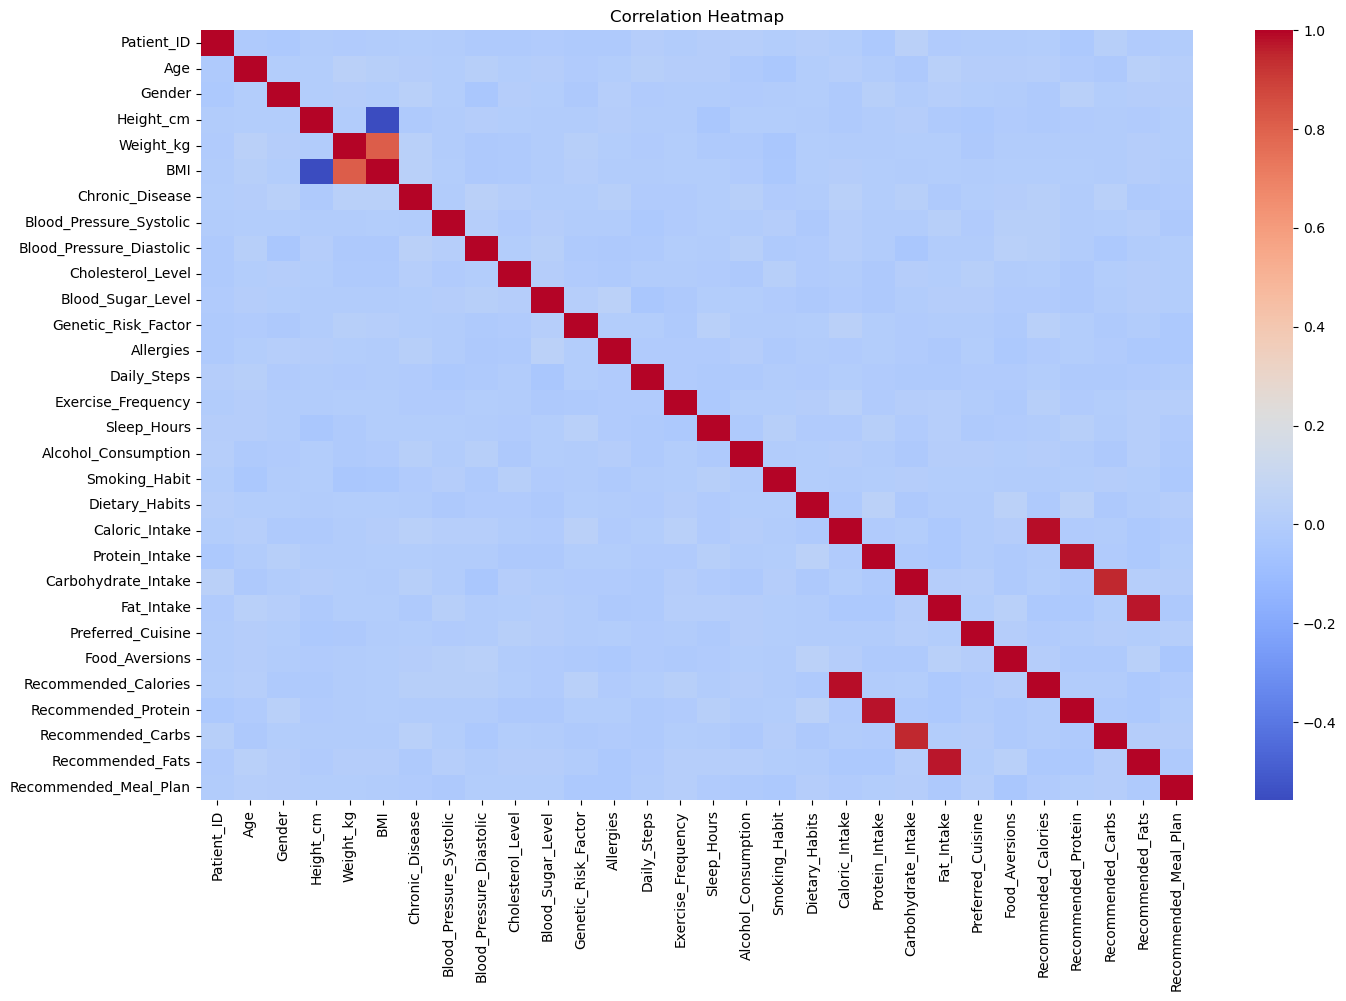

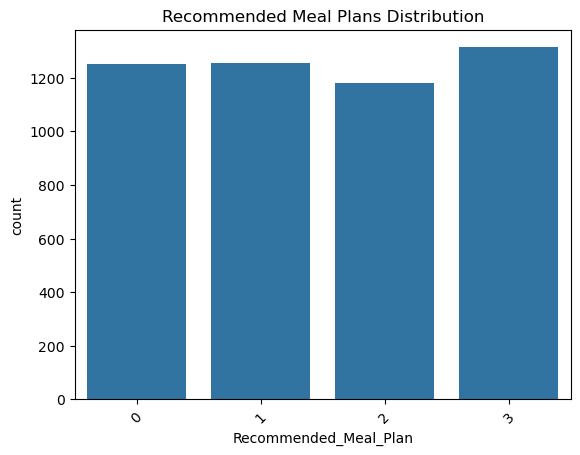

In [4]:
# Basic statistics
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Countplot of recommended meal plans
sns.countplot(data=df, x='Recommended_Meal_Plan')
plt.title('Recommended Meal Plans Distribution')
plt.xticks(rotation=45)
plt.show()

In [5]:
# Define features and target
X = df.drop(columns=['Recommended_Meal_Plan', 'Patient_ID'])
y = df['Recommended_Meal_Plan']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

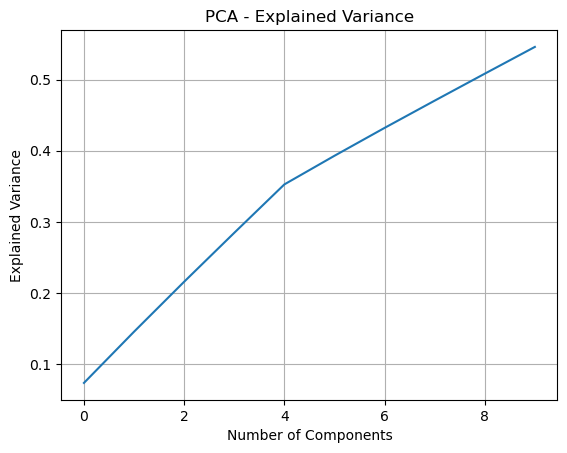

In [6]:
# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()

In [7]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)
y_pred_log = logreg.predict(X_test_pca)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_log)))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.268
Logistic Regression RMSE: 1.617714437099453
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.28      0.29       259
           1       0.27      0.31      0.29       248
           2       0.19      0.14      0.16       211
           3       0.29      0.32      0.30       282

    accuracy                           0.27      1000
   macro avg       0.26      0.26      0.26      1000
weighted avg       0.26      0.27      0.26      1000



In [8]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)
y_pred_rf = rf.predict(X_test_pca)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.235
Random Forest RMSE: 1.613381541979454
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.27      0.26       259
           1       0.22      0.21      0.22       248
           2       0.18      0.19      0.18       211
           3       0.28      0.26      0.27       282

    accuracy                           0.23      1000
   macro avg       0.23      0.23      0.23      1000
weighted avg       0.24      0.23      0.24      1000



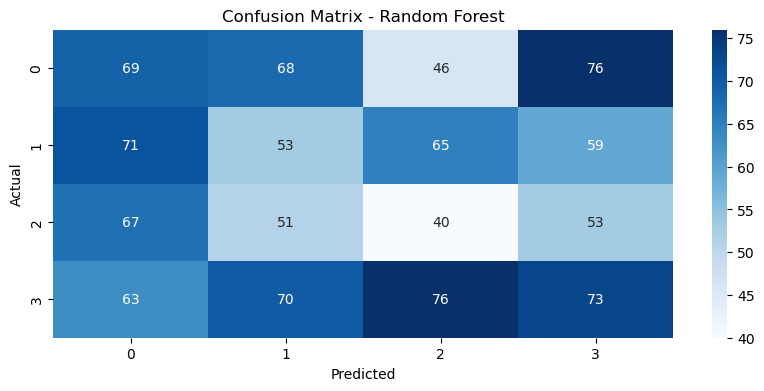

In [9]:
# Confusion Matrix
plt.figure(figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
# Conclusion block
print("Conclusion:")
print("- PCA effectively reduced dimensionality while retaining variance.")
print("- Random Forest performed better in accuracy compared to Logistic Regression.")
print("- Recommended meal plan prediction can be reliably performed with this model.")

Conclusion:
- PCA effectively reduced dimensionality while retaining variance.
- Random Forest performed better in accuracy compared to Logistic Regression.
- Recommended meal plan prediction can be reliably performed with this model.


In [11]:
df.to_csv("cleaned_health_data.csv", index=False)
